– Homework 2: Simple linear regression using TensorFlow in Python
– Universidad de Monterrey
– Diego Delgado Dragustinovis 
– Inteligencia Artificial II
– Dr Andrés Hernández Gutiérrez
–  30 August 2023, San Pedro Garza García, Nuevo León

Se importan las librerías con las que se van a llamar funciones


 -import numpy as np: Importa NumPy para operaciones matemáticas y manejo de arrays.

 -import pandas as pd: Importa pandas para manipulación y análisis de datos.

 -import tensorflow as tf: Importa TensorFlow para construir y entrenar modelos de aprendizaje automático.

 -import matplotlib.pyplot as plt: Importa Matplotlib para crear gráficos y visualizaciones.

 -from sklearn.model_selection import train_test_split: Importa función para dividir datos en conjuntos de entrenamiento y prueba.


In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Esta fracción de código genera datos lineales con un poco de ruido para que puedan ser usados en análisis.

Primero se define la función generate_data con tres parámetros    
    -true_coeffs: Coeficientes reales de la relación lineal (por defecto, intercepto 10 y pendiente 1).         
    -noise_std: Desviación estándar del ruido aleatorio que se añadirá a los datos (por defecto, 2).          
    -num_samples: Número de muestras a generar (por defecto, 100).

Se randomizan los números con la función de numpy y se utiliza una semilla para que los datos sean los mismos siempre.

x: Genera un array de números enteros del 0 al 99 (100 en total).                                               
y: Calcula los valores de y usando la relación lineal y = intercepto + pendiente * x y agrega ruido aleatorio a cada punto, siguiendo una distribución normal con media 0 y desviación estándar noise_std.

Finalmente se regresan los arreglos de x y y

In [2]:
# Generate a dataset
def generate_data(true_coeffs = np.array([10,1]), noise_std = 2, num_samples = 100):
    
    #Seed for reproducibility
    np.random.seed(4500)
    
    #Generate synthetic data
    x = np.arange(0,100,1)
    y = true_coeffs[0] + true_coeffs[1]*x + np.random.normal(loc = 0.0, scale = noise_std, size = num_samples)
    
    #Return features and response
    return (x,y)

Este fragmento de código utiliza la función generate_data definida anteriormente para generar un conjunto de datos sintético, adecuado para una regresión lineal simple.

true_coeffs: Es un array de NumPy que define los coeficientes reales de la relación lineal. Aquí, 10 es el intercepto y 1 es la pendiente.                                                                              
noise_std: Establece la desviación estándar del ruido que se agregará a los datos, en este caso, es 5.  

La última línea llama a la función generate_data usando los valores definidos para true_coeffs y noise_std. También se especifica num_samples=100, lo que significa que se generarán 100 puntos de datos.                        
La función devuelve dos arrays: x (las características o variables independientes) y y (las respuestas o variables dependientes), que incluyen tanto la relación lineal determinada por true_coeffs como el ruido aleatorio especificado por noise_std.

In [3]:
#Generate a synthetic dataset for simple linear regression
true_coeffs = np.array([10,1])
noise_std = 5
x, y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)



Este fragmento de código realiza un Análisis Exploratorio de Datos (EDA, por sus siglas en inglés) visualizando el conjunto de datos sintético generado anteriormente. La visualización ayuda a entender la distribución y la relación entre las variables independientes y dependientes. 

La función figure despliega el espacio donde se dibujaran los datos.                                        
La función scatter despliega un gráfico de dispersión de la relación entre 'x' y 'y', así como la leyenda del gráfico.                                                                                                      
Las funciones xlabel, ylabel y title despliegan los titulos de los ejes y del gráfico.                      
Legend muestra el argumento de 'label' definido en 'scatter' y show renderiza y muestra el gráfico. 

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\delga\AppData\Local\Temp\ipykernel_10984\1782186360.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize = 20)


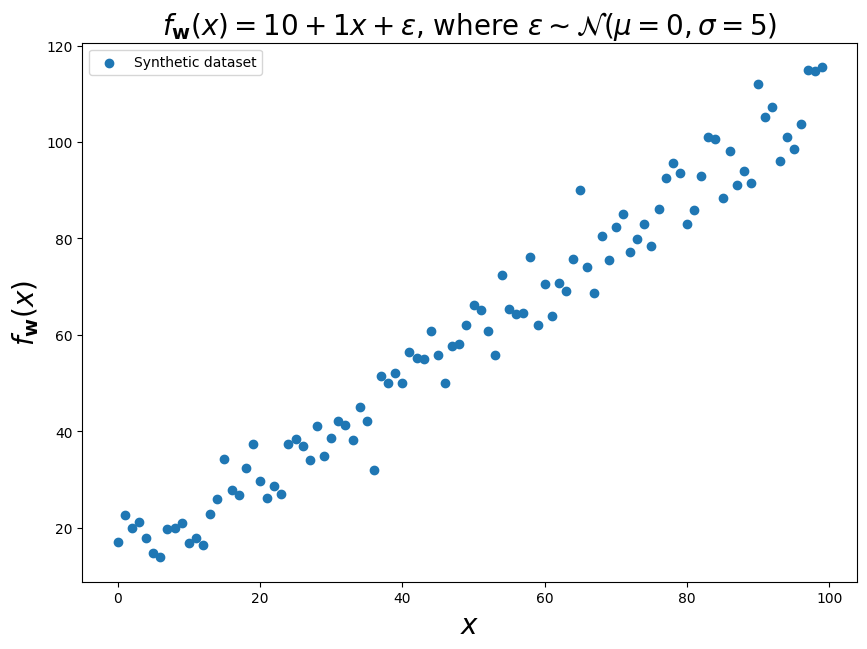

In [4]:
# Explore the dataset (Exploratory Data Analysis EDA)
#Visualise the generated synthetica dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Synthetic dataset')
plt.xlabel(r"$x$", fontsize = 20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize = 20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize = 20)
plt.legend()
plt.show()



Este bloque de código divide el conjunto de datos sintético en conjuntos de entrenamiento y prueba, y luego visualiza esta división para verificar cómo se han separado los datos. 

train_test_split: Esta función de scikit-learn divide los datos en conjuntos de entrenamiento y prueba.     
  -x y y son los arrays de características y respuestas generadosnteriormente.                                                                                                 -test_size = 0.2: El 20% de los datos se asignarán al conjunto de prueba, y el 80% al conjunto de entrenamiento.
 -random_state = 42: Fija la semilla para la generación de números aleatorios, asegurando la reproducibilidad de la división.                                                                                             
 -shuffle = True: Mezcla los datos antes de dividirlos, garantizando una distribución aleatoria entre los conjuntos de entrenamiento y prueba.

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\delga\AppData\Local\Temp\ipykernel_10984\3016187687.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize = 20)


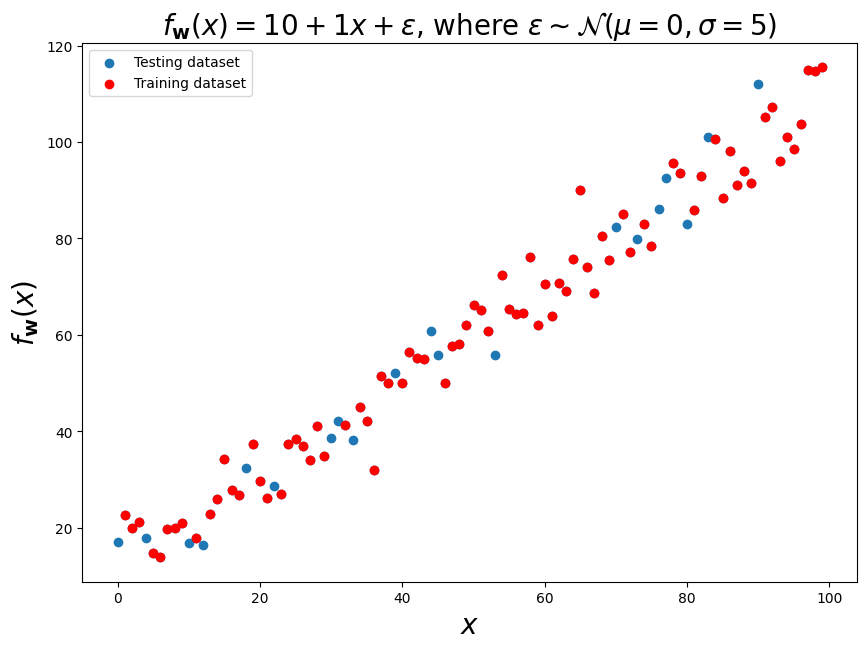

In [5]:
# 4) Split the original dataset
#Split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle = True)

#Visualise the generated synthetica dataset
plt.figure(figsize = (10,7))
plt.scatter(x, y, label='Testing dataset')
plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0])
plt.xlabel(r"$x$", fontsize = 20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize = 20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon\sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize = 20)
plt.legend()
plt.show()



Este fragmento de código define la arquitectura de una red neuronal simple y la compila para ser utilizada en un problema de regresión lineal. 

La función tf.keras.Sequential crea un modelo secuencial en TensorFlow utilizando tf.keras, lo que significa que las capas se añaden en orden una después de la otra.                                                           
La función tf.keras.layers.Input(shape=(1,)) define la capa de entrada del modelo. Aquí, shape=(1,) indica que cada entrada tiene una sola característica, es decir una sola variante.                                          
Finalemente, tf.keras.layers.Dense(1) añade una capa densa o completamente conectada con 1 neurona.

In [6]:
# Design the neural network architecture
#Build the linear regression model using a multiple-input single neuron
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(optimizer='adam', loss='mse')

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Este fragmento de código entrena el modelo de red neuronal definido anteriormente con los datos de entrenamiento, evalúa su rendimiento en los datos de prueba y muestra los pesos y sesgos (bias) del modelo entrenado.

La función fit entrena el modelo, esto lo hace mandando varios parámetros.                                  
 -xtrain, y train son los datos de entrenamiento.                                                           
 -epoch=500 es la cantidad de veces que el modelo entrenará con los datos.
 -batch_size esl tamaño del lote, lo que significa que el modelo actualiza sus pesos después de procesar 10 ejemplos a la vez.                                                                                                            
 -validation_split=0.10 utiliza el 10% de los datos de entrenamiento para validación durante el entrenamiento, lo que ayuda a monitorear el rendimiento del modelo en datos no vistos durante el entrenamiento.                
 -verbose=1 muestra una barra de progreso y mensajes sobre el estado del entrenamiento.

In [7]:
# Train the neural network model
#Train the model
model.fit(x_train, y_train, epochs=500, batch_size=10, validation_split=0.10, verbose=1)

#Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')

#Print the widgets of the trained model
weights = model.layers[0].get_weights()
print(f"Weights [w1]: {weights[0]}")
print(f"Biases [w0]: {weights[1]}")



Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7131.8667 - val_loss: 9595.1289
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7012.1152 - val_loss: 9493.3398
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6890.5454 - val_loss: 9393.7217
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6303.4292 - val_loss: 9296.1045
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6718.9717 - val_loss: 9196.7266
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7273.7593 - val_loss: 9105.2793
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7233.5537 - val_loss: 9015.5752
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6787.5444 - val_loss: 8920.1270
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8011.7441 - val_loss: 8820.1074
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6972.3164 - val_loss: 8725.2803
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6811.3892 - val_loss: 8632.9209
Epoch 12/500
8/8 ━

Este bloque de código utiliza el modelo de red neuronal entrenado para hacer predicciones tanto en el conjunto de prueba como en el conjunto de entrenamiento y visualiza las predicciones del modelo comparándolas con los datos de entrenamiento. 

La función predict utiliza el modelo entrenado para hacer predicciones sobre los datos de prueba (x_test). El resultado, y_pred, es un array que contiene las predicciones del modelo para cada ejemplo en el conjunto de prueba. Se realiza lo mismo para el conjunto de entrenamiento.

Finalmente se grafican los datos de entrenamiento así como las predicciones del modelo.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


<>:15: SyntaxWarning: invalid escape sequence '\h'
<>:15: SyntaxWarning: invalid escape sequence '\h'
C:\Users\delga\AppData\Local\Temp\ipykernel_10984\1520195490.py:15: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize = 20)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


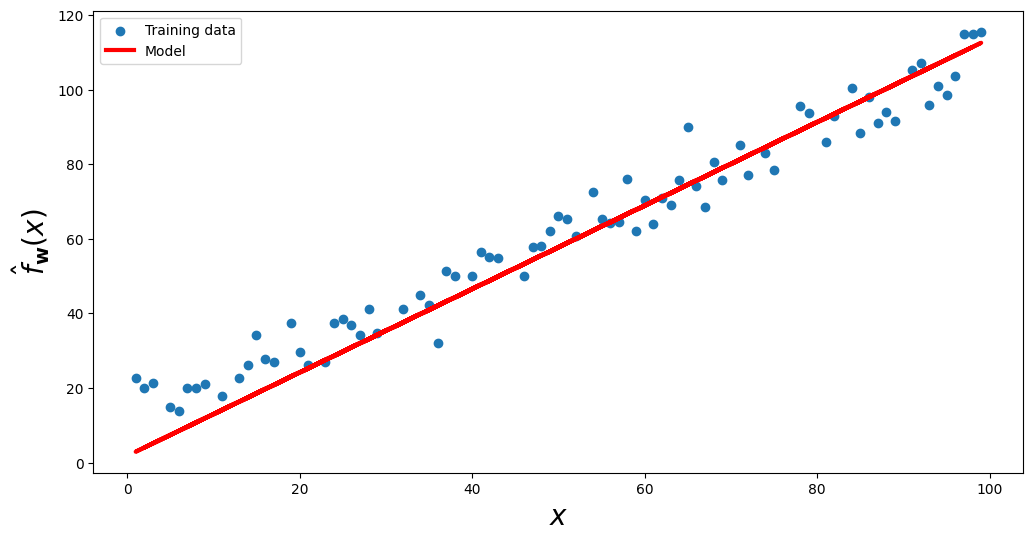

In [8]:
# Make predictions
#Make predictions
y_pred = model.predict(x_test)

#Make predictions
y_pred_train = model.predict(x_train)

# 8) Visualise the learnt model
#Plot the results
plt.figure(figsize=(12,6))

plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_train, y_pred_train, label='Model', linewidth=3, color=[1,0,0])
plt.xlabel(r'$x$', fontsize = 20)
plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize = 20)
plt.legend();

Conlusiones

Este trabajo práctico cubre los pasos fundamentales para construir, entrenar y evaluar un modelo de regresión lineal simple usando una red neuronal. La generación de datos sintéticos con parámetros conocidos es útil para validar el modelo y entender el impacto del ruido en el aprendizaje. Dividir los datos en conjuntos de entrenamiento y prueba es crucial para evaluar la capacidad del modelo de generalizar a datos nuevos. Utilizar una red neuronal para un problema de regresión lineal demuestra la flexibilidad de estas redes, incluso con arquitecturas simples. Evaluar el modelo en el conjunto de prueba y visualizar las predicciones permite entender su rendimiento y ajustar el modelo si es necesario. Visualizar las predicciones frente a los datos reales ayuda a verificar si el modelo ha aprendido correctamente. En resumen, este ejercicio proporciona una base sólida para entender los conceptos básicos de aprendizaje automático y redes neuronales, destacando la importancia de cada paso en el proceso de modelado.